In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [78]:
image = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/Inputs/Arp57.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


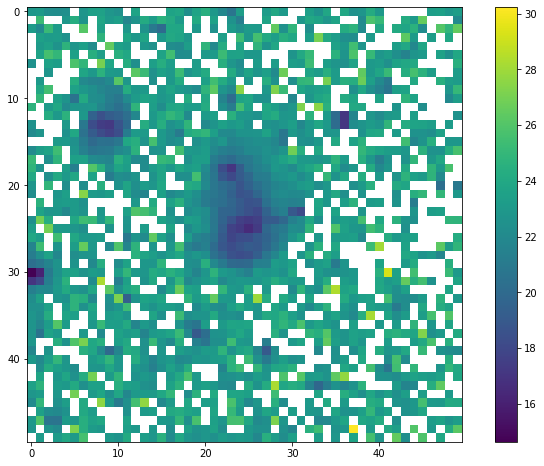

In [79]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(image) - 48.6)
plt.colorbar()

In [94]:
clipped_image = sigma_clip(image,sigma=10,maxiters=1,cenfunc = 'median')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


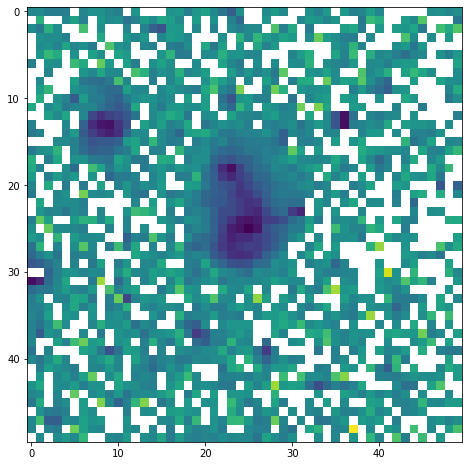

In [95]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(clipped_image) - 48.6)

### Creating Mask Array

In [96]:
mask = clipped_image.mask

In [97]:
stellar_pixels = np.where(mask)

In [98]:
image_test = image.copy()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


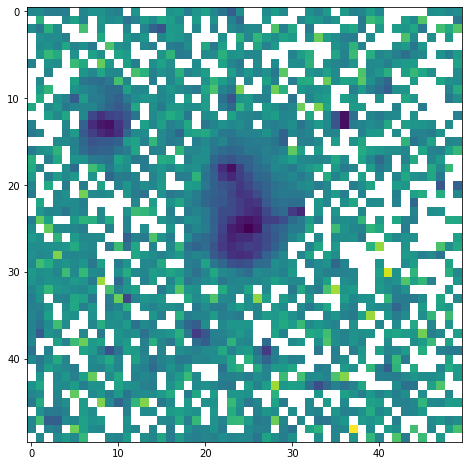

In [99]:
for i in range(len(stellar_pixels[0])):
    x = stellar_pixels[0][i]
    y = stellar_pixels[1][i]
    
    if x - 3 < 0:
        x = x + 3
    if x + 3 > image.shape[0]:
        x = image.shape[0] - 3
    if y - 3 < 0:
        y = y + 3
    if y + 3 > image.shape[1]:
        y = image.shape[1] - 3
    
    replacement = np.median(image[x-3:x+3,y-3:y+3])*np.random.random([6,6])
    
    image_test[x-3:x+3,y-3:y+3] = replacement

plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(image_test) - 48.6)